# Resturant gratuity analysis using Seaborn

## Context : 
Tip here refers to gratuity, a small amount of money left for an waiter as a token of appreciation for their service. A waiter in a certain resturant collected data for the tip amount recieved during the shifts (Thrusday - Sunday).

## Need:
In a resturant, a waiter is a tipped employee and most of their income comes from gratuity provided by the customer. The waiters are paid minimum wage by the employer so tips are more than thank you for the waiter. It is a major source of income for them (waiters). It is convetional to pay 15-20% tip of the total bill for a good service provided. 

## Vision: 
To analyze the pattern if any in the amount of gratuity received and identify how to maximize gratuity for the waiter. 
The dataset used is from the seaborn library. The goal is to use the Seaborn visualization tool to extract meaningful observations.

## Output for different stakeholders:

### Waiter
1. More customers visit during Saturday and Sunday for dinner and on Thursday for lunch. 
2. Females tipped slightly better than males. 
3. A party of size 1-3 generally give higher tips. 
4. Average tip percentage was 15%. 

So to get a higher tip it is better to serve in the weekend shifts.

### Customer
The resturant is more packed during Thrsday lunch time and Saturday and Sunday dinner time. So for a faster service or to avoid large crowd ( to maintain social distancing ) customers can visit for lunch during weekends or for dinner on a weekday like Thrusday. 

In [1]:
# import the required libraries
import seaborn as sns
sns.set() # In versions of seaborn prior to 0.8, set() was called on import. On later versions, it must be explicitly invoked to switch to seaborn defaults.
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('whitegrid')# sets the style for the whole notebook

In [2]:
# loading the seaborn "tips" data set
tip = sns.load_dataset('tips')

In [3]:
# evalaute the data set 
tip.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
tip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


#### The dataset shows the amount of tip given by different parties of cutomers after a meal. 
So, this dataset has 7 columns and 244 rows. The different features of the dataset are :
1. Total bill : the total amount of the bill 
2. Tip : amount of the tip given 
3. Sex: gender of the payer of the bill
4. Smoker : yes or no, whether the party included smoker
5. Day : day of the week
6. Time : Breakfast, lunch or dinner
7. Size: size of the group


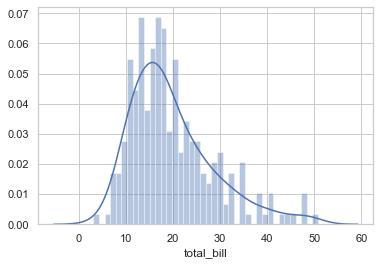

In [5]:
# Let's see the distribution of the total bill amount
sns.distplot(tip['total_bill'], bins= 40)

#### Most people have a bill amount of around 10 -20$. 

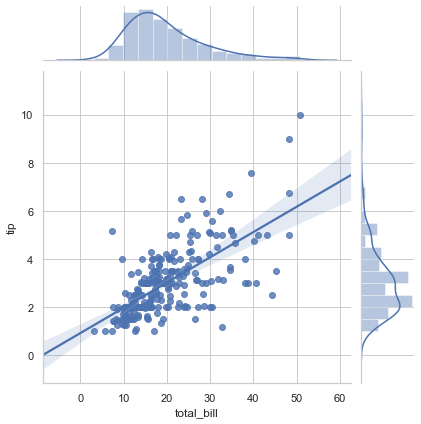

In [6]:
# Bivariate data
sns.jointplot(x ='total_bill', y ='tip', data =tip, kind ='reg')

#### The plot above shows the distribution of the total bill and the tips given following that. Maximum people had a total bill of around \\$10 -\\$20 and gave a tip around \\$1-\\$4. Further, the distribution follows a linear distribution and as the value of the bill increases, more tip is given.   

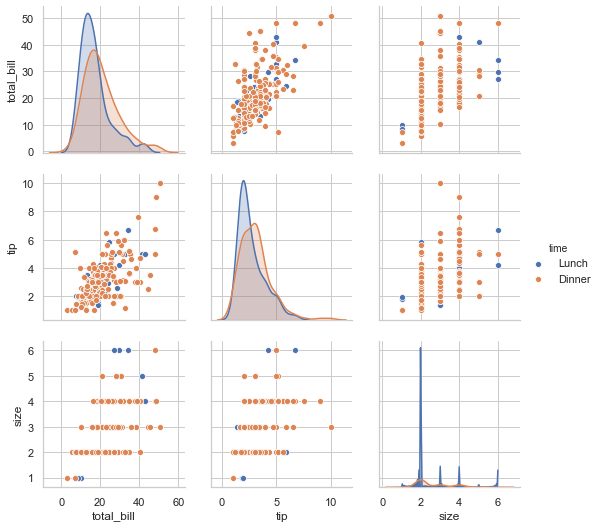

In [7]:
# Pairplot = To viasualize the distribution of features in different pairs in thedataset. By default plots the numerical values but specifying hue helps in visualizing the distribution according to the category
sns.pairplot(tip, hue='time')

#### The above plot shows, although more people visted for lunch than dinner, they spent more money on dinner and also gave more tip.

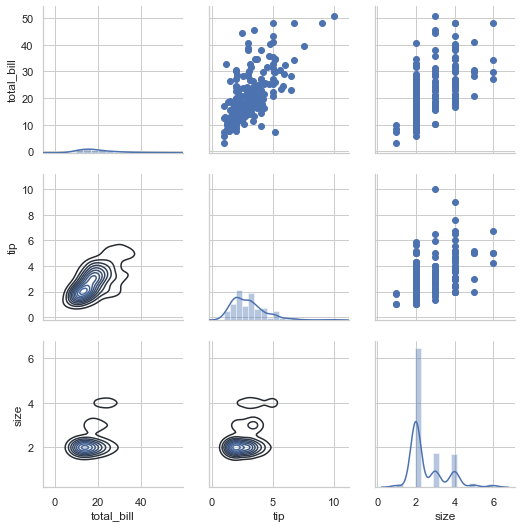

In [8]:
# Using pairgrid : Gives more control over individual sub plots
# Pairplot is a siplified version of pairgrid. 
a = sns.PairGrid(tip)
a.map_diag(sns.distplot)
a.map_upper(plt.scatter)
a.map_lower(sns.kdeplot)

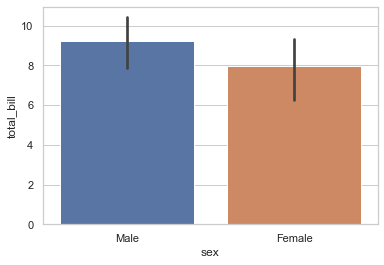

In [9]:
# Who pays more bill
# In a categorical plot like this, x is the categorical variable while y is a numerical variable
sns.barplot(x='sex',y='total_bill',data=tip, estimator=np.std)

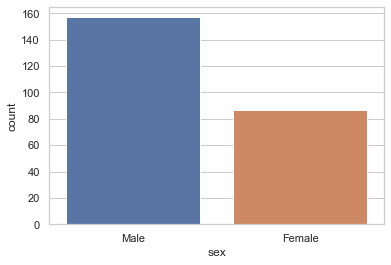

In [10]:
sns.countplot(x='sex', data=tip)

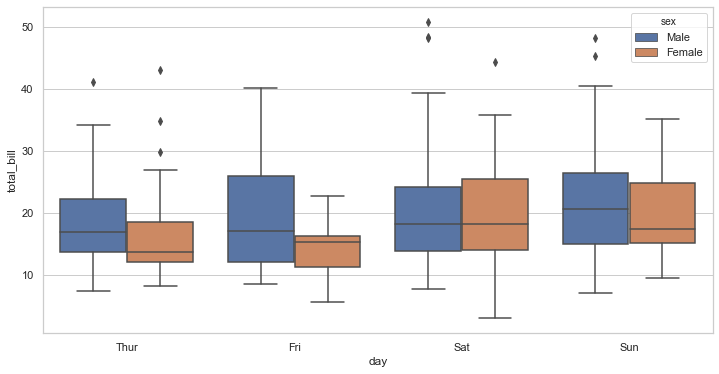

In [12]:
# Box plot easy to raed and good for management and general audience
plt.figure(figsize =(12,6))
sns.boxplot(x='day',y='total_bill',data=tip,hue='sex')

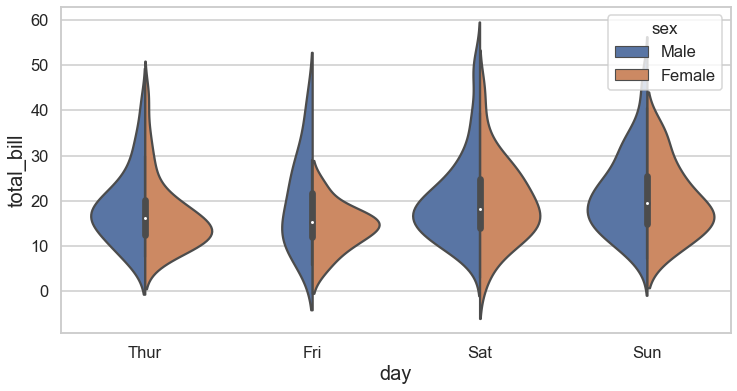

In [13]:
# split helps in puuthing the two different categories in one violin plot

plt.figure(figsize =(12,6))
sns.set_context('talk',rc={"font.size":8,"axes.titlesize":12,"axes.labelsize":20})
sns.violinplot(x='day',y='total_bill',data=tip,hue='sex',split=True)

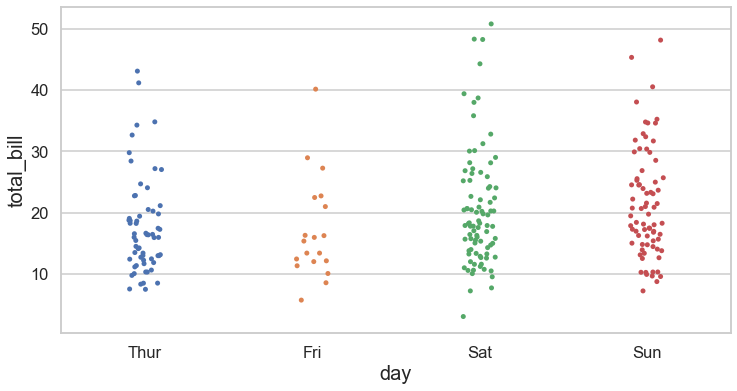

In [14]:
# Jitter helps in separating the values to visualize them independently by adding some random data points 
plt.figure(figsize =(12,6))
sns.set_context('talk',rc={"font.size":8,"axes.titlesize":12,"axes.labelsize":20})
sns.stripplot(x='day',y='total_bill',data=tip,jitter =True)

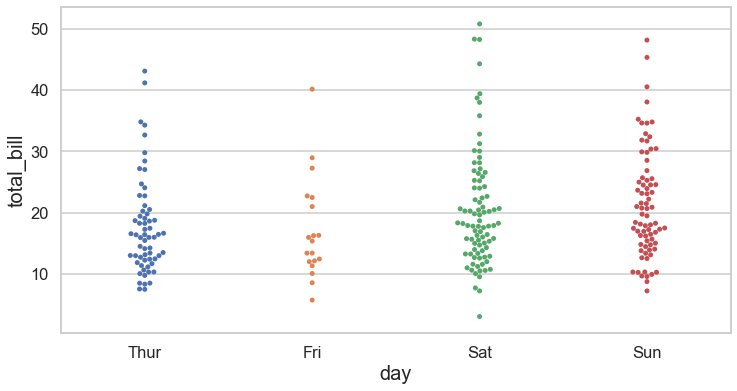

In [15]:
# swarm plot allows to visualize the strip plot more clearly by plotting it along with a voilin plot
plt.figure(figsize =(12,6))
sns.set_context('talk',rc={"font.size":8,"axes.titlesize":12,"axes.labelsize":20})
sns.swarmplot(x='day',y='total_bill',data=tip)

# takes a lot of computational space and difficult for large data sets

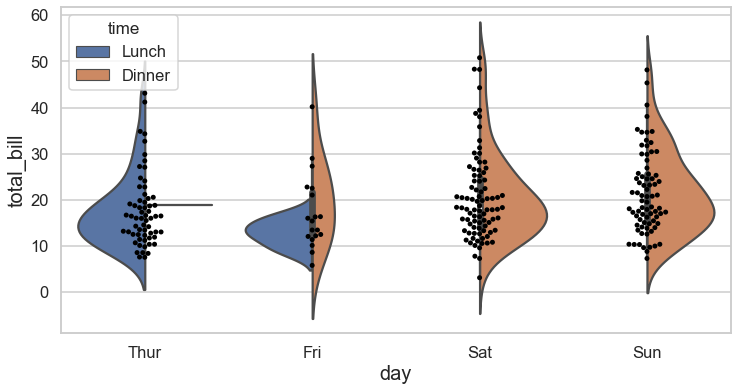

In [16]:
# Combining with a voilin plot and a swarm plot makes it easier to understand 
# Good for exploratory data analysis but not for data visualization
plt.figure(figsize =(12,6))
sns.set_context('talk',rc={"font.size":8,"axes.titlesize":12,"axes.labelsize":20})
sns.violinplot(x='day',y='total_bill',data=tip,hue='time', split= True)
sns.swarmplot(x='day',y='total_bill',data=tip, color ='black')

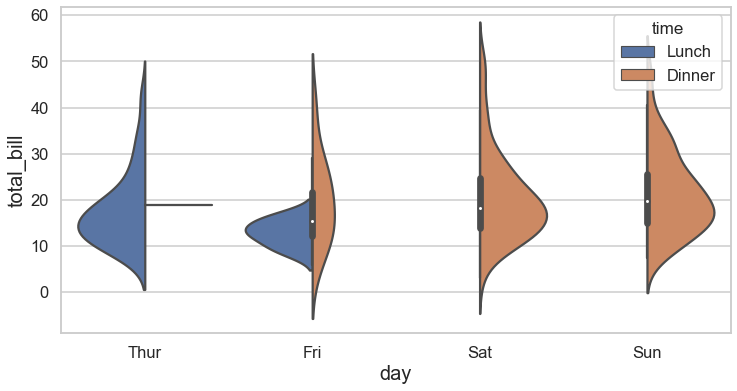

In [17]:
plt.figure(figsize =(12,6))
sns.set_context('talk',rc={"font.size":8,"axes.titlesize":12,"axes.labelsize":20})
sns.violinplot(x='day',y='total_bill',data=tip,hue='time', split= True)

### This shows that  during weekend, people went for dinner more than for lunch while on Thursady which is a weekday, people dont go out for dinner , just for lunch

/Applications/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 864x432 with 0 Axes>

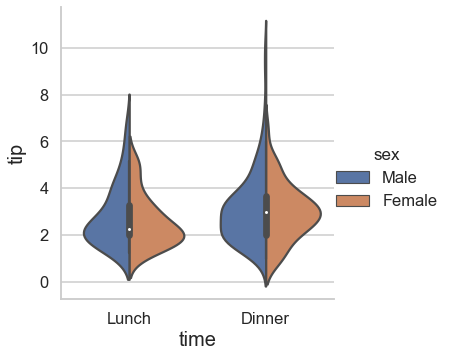

In [18]:
# Most general form of plot, it takes akind argument to define whats the plot will be 
plt.figure(figsize =(12,6))
sns.set_context('talk',rc={"font.size":8,"axes.titlesize":12,"axes.labelsize":20})
sns.factorplot(x='time',y='tip',hue='sex',data=tip, kind='violin',split=True)

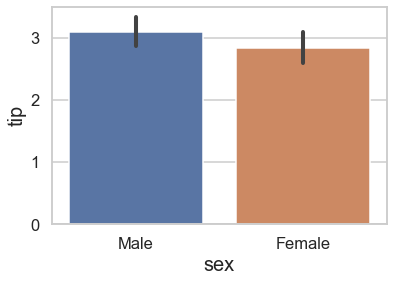

In [19]:
sns.set_context('talk',rc={"font.size":8,"axes.titlesize":12,"axes.labelsize":20})
sns.barplot(x='sex',y='tip',data=tip,estimator=np.mean)

In [20]:
# calculate tip percentage 
tip['tip_percent']= (tip['tip']/tip['total_bill'])*100
tip.head(5)

,total_bill,tip,sex,smoker,day,time,size,tip_percent
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


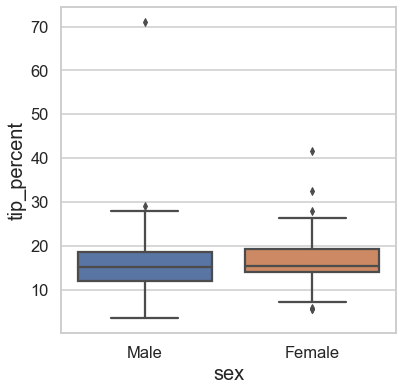

In [21]:
plt.figure(figsize =(6,6))
sns.set_context('talk',rc={"font.size":8,"axes.titlesize":12,"axes.labelsize":20})
sns.boxplot(x='sex',y='tip_percent',data=tip)

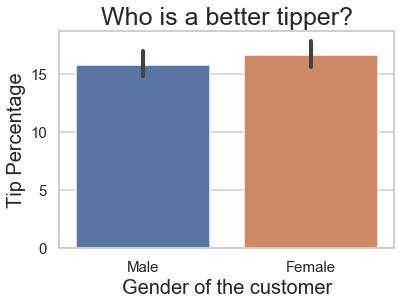

In [22]:
b=sns.barplot(x='sex',y='tip_percent',data=tip)
b.axes.set_title("Who is a better tipper?",fontsize=25)
b.set_xlabel("Gender of the customer",fontsize=20)
b.set_ylabel("Tip Percentage",fontsize=20)
b.tick_params(labelsize=15)


### Higher tip is given during dinner than lunch, and female give higher percent of tip than male.  

In [23]:
tip.describe()

,total_bill,tip,size,tip_percent
count,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672,16.080258
std,8.902412,1.383638,0.951100,6.107220
min,3.070000,1.000000,1.000000,3.563814
25%,13.347500,2.000000,2.000000,12.912736
50%,17.795000,2.900000,2.000000,15.476977
75%,24.127500,3.562500,3.000000,19.147549
max,50.810000,10.000000,6.000000,71.034483


On average, people gave 15% of total bill as tip. 

In [24]:
tc = tip.corr()
tc

,total_bill,tip,size,tip_percent
total_bill,1.000000,0.675734,0.598315,-0.338624
tip,0.675734,1.000000,0.489299,0.342370
size,0.598315,0.489299,1.000000,-0.142860
tip_percent,-0.338624,0.342370,-0.142860,1.000000


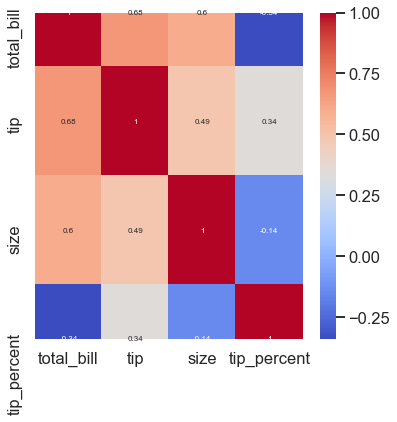

In [25]:
plt.figure (figsize=(6,6))
sns.heatmap(tc,annot=True,cmap='coolwarm')

In [26]:
tp = tip.pivot_table(index='day',columns='time',values='size')

In [27]:
tp.head(5)

time,Lunch,Dinner
day,,
Thur,2.459016,2.000000
Fri,2.000000,2.166667
Sat,NaN,2.517241
Sun,NaN,2.842105


In [28]:
p = tip.groupby(['day','time']).sum()
p

total_bill     tip   size  tip_percent
day  time                                          
Thur Lunch      1077.55  168.83  150.0   983.934490
     Dinner       18.78    3.00    2.0    15.974441
Fri  Lunch        89.92   16.68   14.0   132.135422
     Dinner      235.96   35.28   26.0   190.699333
Sat  Lunch          NaN     NaN    NaN          NaN
     Dinner     1778.40  260.40  219.0  1332.419933
Sun  Lunch          NaN     NaN    NaN          NaN
     Dinner     1627.16  247.39  216.0  1268.419376

In [29]:
pp = p.pivot_table(index ='day',columns='time',values='size',fill_value =0)
pp

time,Lunch,Dinner
day,,
Thur,150,2
Fri,14,26
Sat,0,219
Sun,0,216


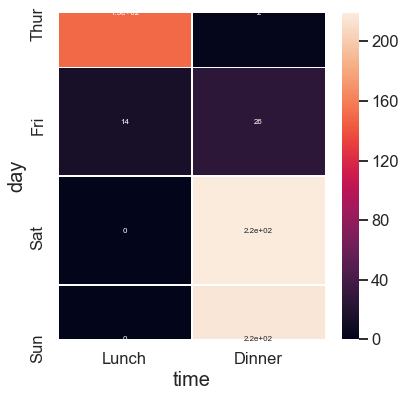

In [30]:
plt.figure (figsize=(6,6))
sns.heatmap(pp,annot=True,Cmap='magma',linecolor='white',linewidths=1)

Around 220 people went for dinner on saturday and sunday while 150 went for lunch. 

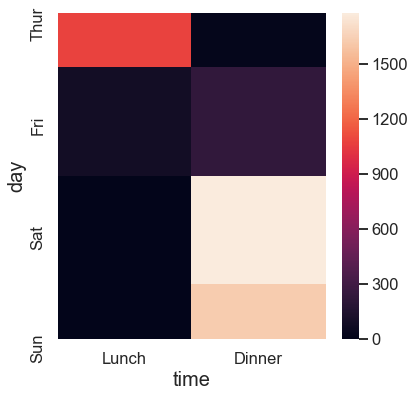

In [31]:
tt = p.pivot_table(index='day',columns='time',values='total_bill',fill_value=0)
plt.figure (figsize=(6,6))
sns.heatmap(tt)

In [32]:
tt

time,Lunch,Dinner
day,,
Thur,1077.55,18.78
Fri,89.92,235.96
Sat,0.00,1778.40
Sun,0.00,1627.16


<Figure size 432x432 with 0 Axes>

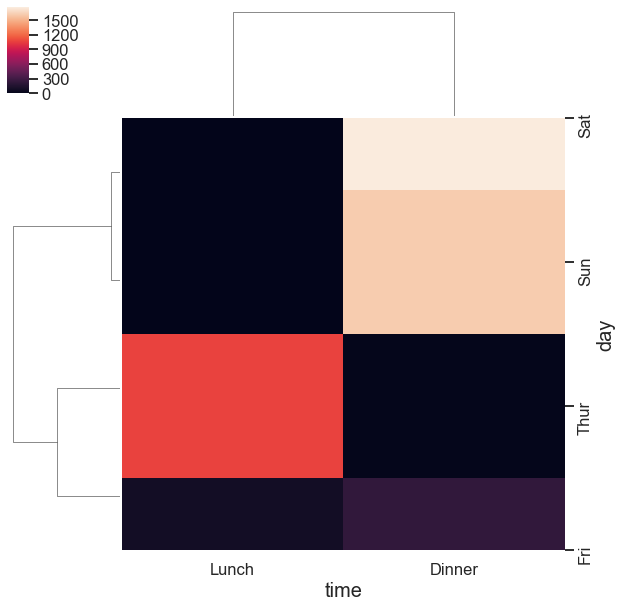

In [33]:
# A clustermap places the similar items closer to each other while heat map shows the items in the order present in the dataframe.
plt.figure (figsize=(6,6))
sns.clustermap(tt)

This shows the relationship between different variables with dinner time of saturday and sunday showing similar clustering. As observed previously, higher occupancy was on saturday and sunday during dinner.

<Figure size 864x432 with 0 Axes>

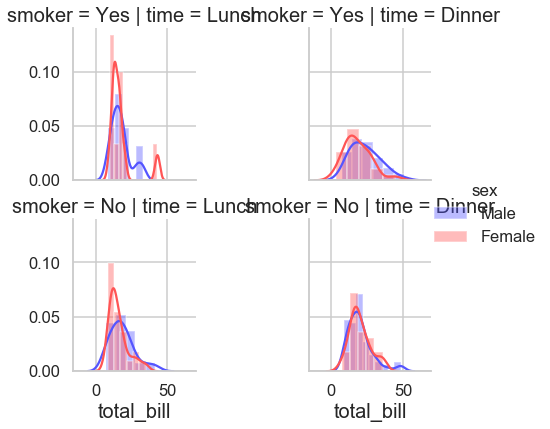

In [34]:
# Facetgrid - to create grids of plots based off of a feature
plt.figure(figsize=(12,6))
f = sns.FacetGrid(data=tip, col ='time' , row ='smoker', hue ='sex', palette ='seismic')
f.map(sns.distplot,'total_bill').add_legend()


This shows that, more female smoker customers visted during lunch time compared to non smoker as well as male customers. On the otherhand,  male smoker customers paid slightly higher bill during dinner while there was no gender specific payment difference among non smokers. 

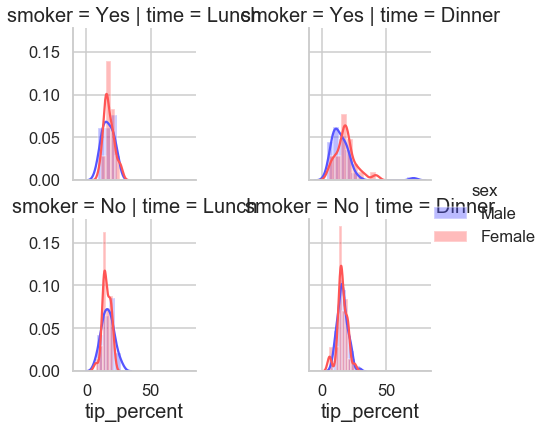

In [35]:
f = sns.FacetGrid(data=tip, col ='time' , row ='smoker', hue ='sex', palette='seismic')
f.map(sns.distplot,'tip_percent').add_legend()

Overall, it appears on avergae both male and female  give equal percent of tip. However, during dinner compared to male, female smoker customers give more percent of tip. This contrasts to the trend observed in payment of total bill amount during dinner by smoker customers. 

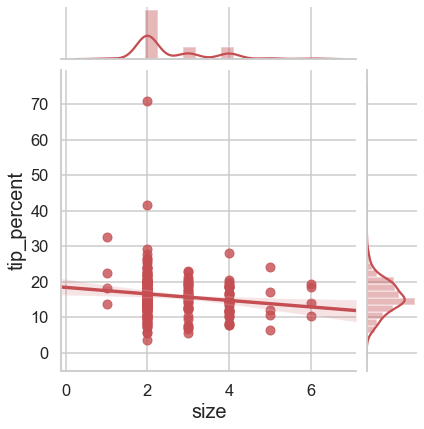

In [36]:
# size vs tip percent 
sns.jointplot(x ='size', y ='tip_percent', data =tip, kind ='reg', color ='r')

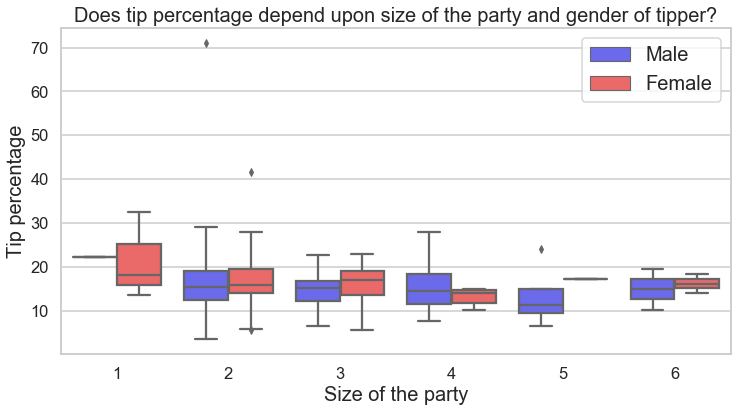

In [37]:
# size vs tip percent vs gender
plt.figure(figsize=(12,6))
a =sns.boxplot(x='size',y='tip_percent',hue ='sex',data=tip, palette='seismic')
a.set_title('Does tip percentage depend upon size of the party and gender of tipper?', fontsize=20)
a.set_xlabel('Size of the party', fontsize=20)
a.set_ylabel('Tip percentage',fontsize=20)
a.legend(fontsize=20)

<Figure size 432x432 with 0 Axes>

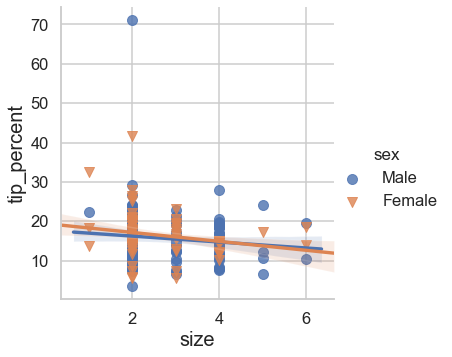

In [38]:
# linear fit for size vs tip percent vs gender 
plt.figure(figsize=(6,6))
sns.lmplot(x='size',y='tip_percent',hue ='sex',data=tip, markers=['o','v'], scatter_kws={'s':100})


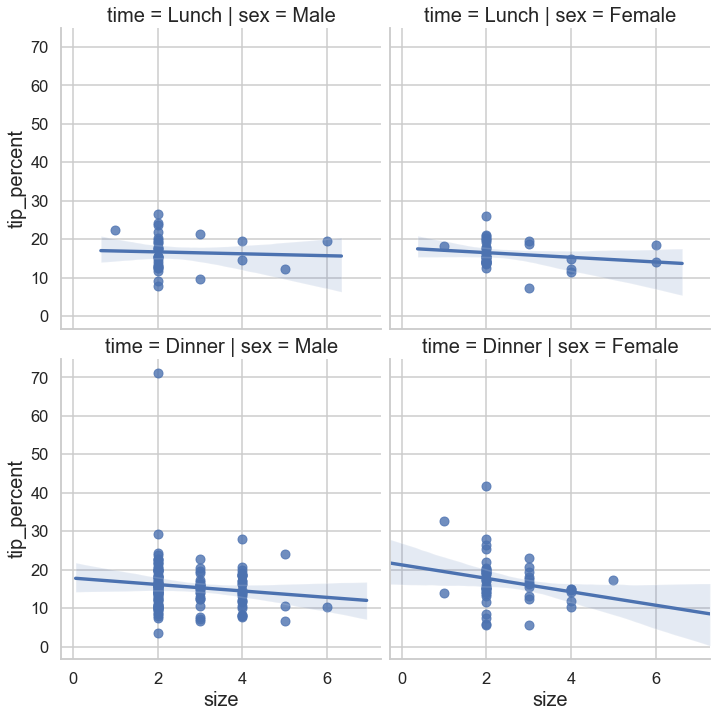

In [39]:
sns.lmplot(x='size',y='tip_percent',data=tip,col ='sex',row ='time')

- Max number of customers came in a party of two. 
- With size of party, the tip percent decreased and the waiter has better chance of getting a good percent of tip if s/he serves a party of 1-3. 
- Irrespective of party size, on average female tipped better than male customers.
- Male and female have similar fit showing not much difference is observed due to gender in the tipping behaviour with increase in size.

## Summary 

The waiter should  serve in the dinner time of weekend shifts to get higher tip and customers can visit during lunch time on weekends to have a quiter meal. 

